TRIOS_VIPER_AbsorptionCoefficient_plot.py<br>
Description: convert optical density measured with Trios Viper spectrophotometer to absorption coefficient and plot values in a graph<br>
Author: Martin Rapilly, Geosciences Environnement Toulouse<br>

<br>Download the CSV file from VIPER spectrophotometer. <br>Open the ABSORPTI file with OpenOffice Calc and convert it to excel.<br>
In column Comment2, add a description of the sample location. For example: "Station 1, field measurement" or "blank" <br>
In column Comment3, add the path length in meter. For example: 0.05<br>
For each path length used for the samples, a corresponding blank has to be entered in the excel file. For instance, if a sample is taken on station 4 in situ (path length of 10 cm), values for a blank with a path length of 10 cm have to be entered in the file (with "blank" in column Comment2 and "0.1" in column Comment3.<br>
The structure should look like this:<br>
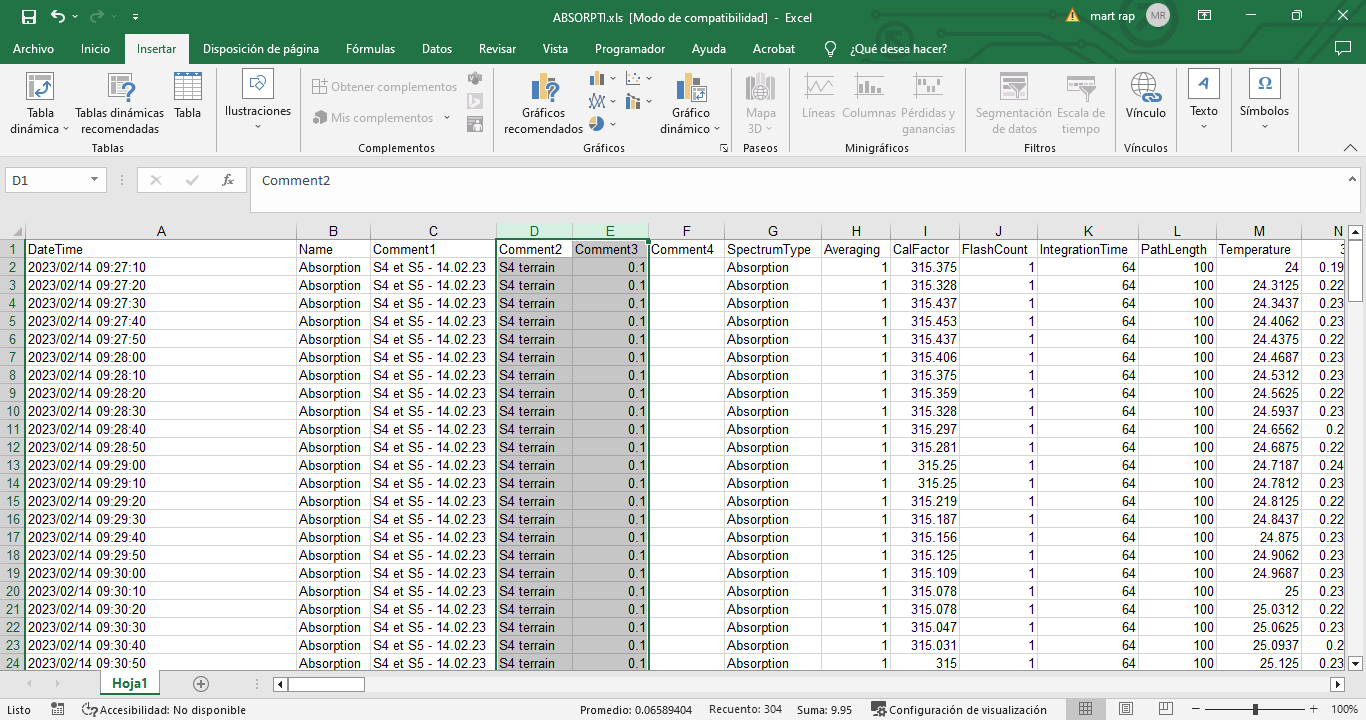
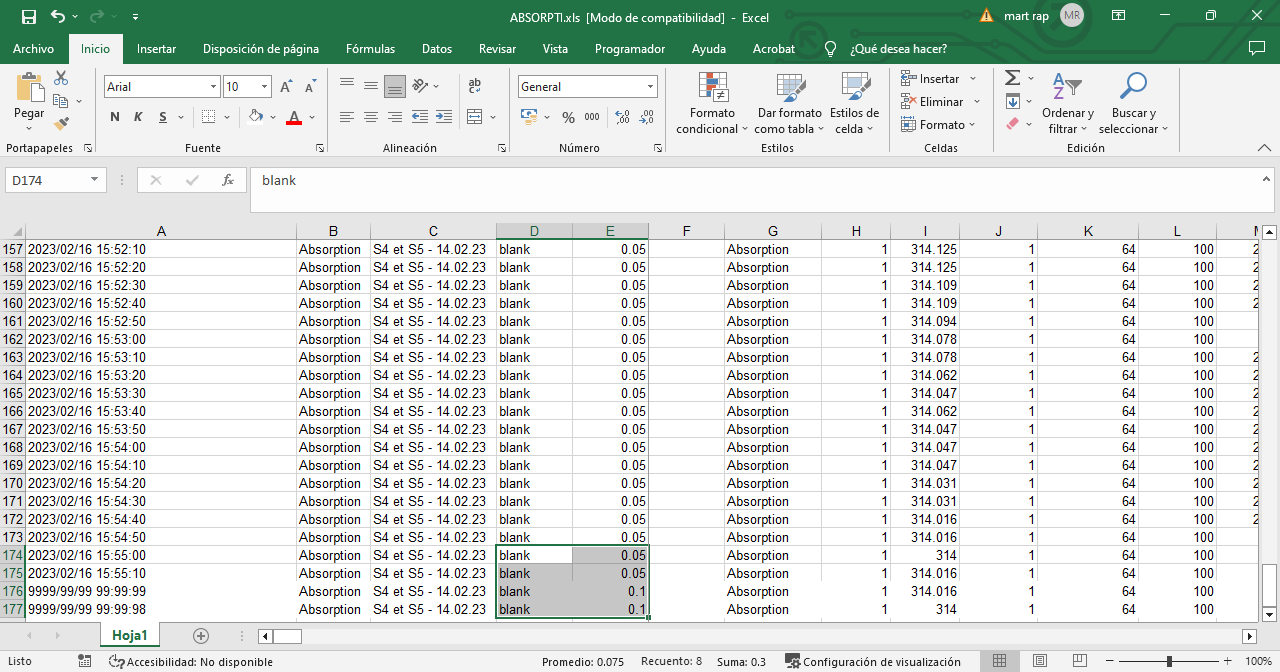

Define the path of your ABSORPTI.xls file and your output folder,Then run the rest of the code

In [51]:
#input file
excel=r"F:\DOCTORADO\Données\mesures biogéochimiques et radiometriques\Résultats Mesures radiométriques terrain\bases de données\backup bases de données radiometres et spectrophotometre 29-11-22\spectrophotometre\ABSORPTI.xls"#first col is wavelength, other columns are different stations/dates/filterSize
#output folder
outPath=r"C:\Users\marti\Downloads"

In [52]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd

#read excel file and convert it to a pandas dataframe
df = pd.read_excel(excel)

#create a list of samples defined by their descriptions in column2 (station 1 at 0.22 microns, station 2 at 0.45 microns, etc.)
listSamples=df['Comment2'].unique().tolist()
print (listSamples)

#create a list of wavelengths that are sampled by the spectrophotometer (contained in the names of columns 13 to 190)
listColNamesWL=[]
for colname in df.columns[13:191]:
    value=float(colname)
    listColNamesWL.append(value)
print ("listColNamesWL",listColNamesWL)

#calculate median values for blanks with pathlengths of 0.04, 0.05 and 0.1 meter and store it in a dataframe
listBlank=[]#temporary list to store blank values and put it into a dataframe
dfBlank004=pd.DataFrame()#dataframe for the blank with a pathlength of 0.04 m (4 cm)
dfBlank005=pd.DataFrame()#dataframe for the blank with a pathlength of 0.05 m (5 cm)
dfBlank01=pd.DataFrame()#dataframe for the blank with a pathlength of 0.1 m (10 cm)

#Get absorption coefficients for the blanks
#Get Optical Density values and convert it to an absorption coefficient for all wavelength in a list if they correspond to one same blank with the same wavelength
for line in range(df.shape[0]):#check all lines in the excel file
    if df.iloc[line]["Comment2"]=='blank' and float(df.iloc[line]["Comment3"])==0.05:#get values of blanks with pathlength of 0.05 meter
        for value in range (13,191):#get values for all wavelengths (stored in columns 13 to 190)
            listBlank.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3']))#calculate the absorption coefficient
        dfBlank005[df.iloc[line]["DateTime"]] = listBlank#load the list to the temporary dataframe as a new column with name corresponding to the date
        listBlank=[]#empty the list for next loop
    elif df.iloc[line]["Comment2"]=='blank' and float(df.iloc[line]["Comment3"])==0.1:#get values of blanks with pathlength of 0.1 meter
        for value in range (13,191):
            listBlank.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3']))
        dfBlank01[df.iloc[line]["DateTime"]] = listBlank
        listBlank=[]
    elif df.iloc[line]["Comment2"]=='blank' and str(df.iloc[line]["Comment3"])==0.04:#get values of blanks with pathlength of 0.04 meter
        for value in range (13,191):
            listBlank.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3']))
        dfBlank004[df.iloc[line]["DateTime"]] = listBlank
        listBlank=[]
        
#calculate median values for the blanks        
dfBlank004['blankMedian'] = dfBlank005.median(axis=1)
dfBlank005['blankMedian'] = dfBlank005.median(axis=1)
dfBlank01['blankMedian'] = dfBlank01.median(axis=1)

#store median values for the blanks in separate lists
listBlankMedian004 = dfBlank005["blankMedian"].values.tolist()
listBlankMedian005 = dfBlank005["blankMedian"].values.tolist()
listBlankMedian01 = dfBlank01["blankMedian"].values.tolist()

['S4 terrain', 'S5 terrain', 'S4 - 0.22 micrometer', 'S5 - 0.22 micrometer', 'S4 - 0.45 micrometer', 'S5 - 0.45 micrometer', 'blank']
listColNamesWL [348.8, 350.945, 353.09, 355.235, 357.379, 359.524, 361.667, 363.811, 365.954, 368.097, 370.239, 372.382, 374.523, 376.665, 378.806, 380.947, 383.087, 385.227, 387.367, 389.506, 391.645, 393.784, 395.922, 398.059, 400.197, 402.334, 404.47, 406.606, 408.742, 410.877, 413.012, 415.147, 417.281, 419.414, 421.547, 423.68, 425.812, 427.944, 430.076, 432.207, 434.337, 436.467, 438.597, 440.726, 442.854, 444.982, 447.11, 449.237, 451.364, 453.49, 455.615, 457.74, 459.865, 461.989, 464.113, 466.236, 468.358, 470.48, 472.602, 474.723, 476.843, 478.963, 481.082, 483.201, 485.319, 487.437, 489.554, 491.671, 493.786, 495.902, 498.017, 500.131, 502.244, 504.357, 506.47, 508.582, 510.693, 512.803, 514.913, 517.023, 519.131, 521.239, 523.347, 525.454, 527.56, 529.665, 531.77, 533.875, 535.978, 538.081, 540.183, 542.285, 544.386, 546.486, 548.586, 550.685

sample S4 terrain


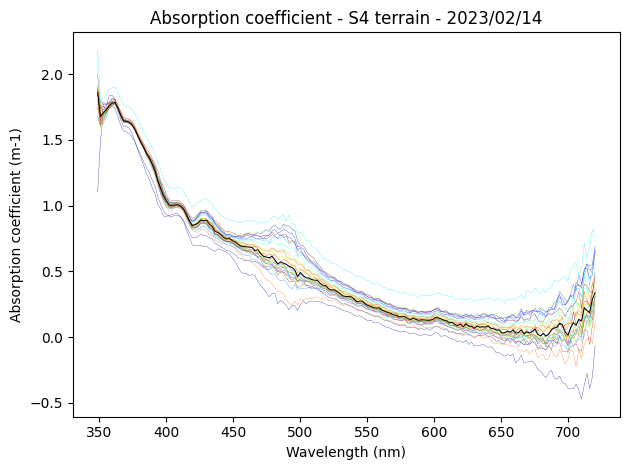

jpg done for sample S4 terrain
sample S5 terrain


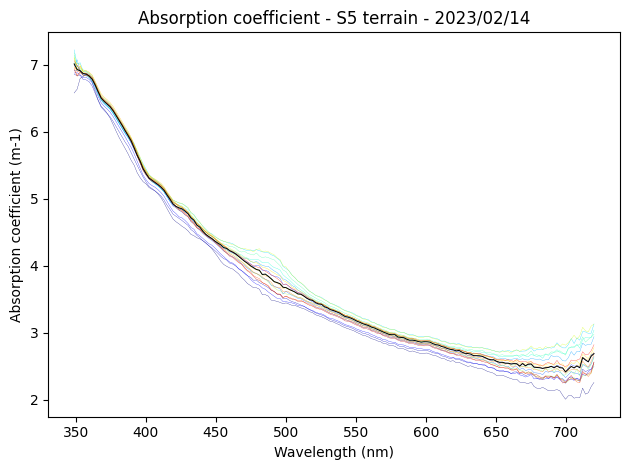

jpg done for sample S5 terrain
sample S4 - 0.22 micrometer


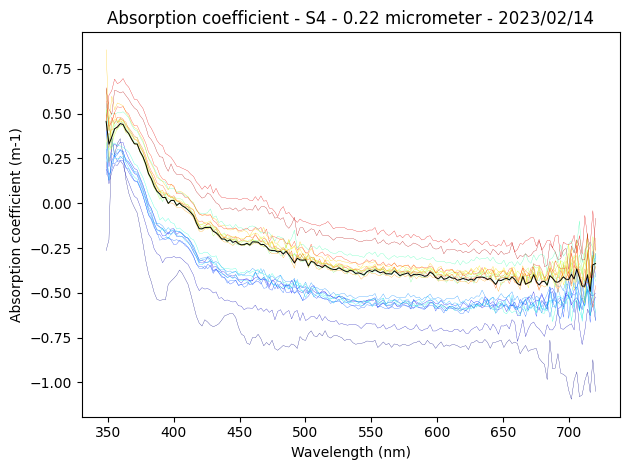

jpg done for sample S4 - 0.22 micrometer
sample S5 - 0.22 micrometer


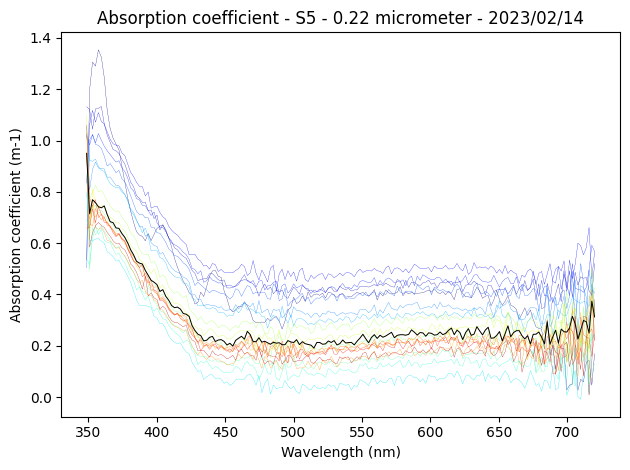

jpg done for sample S5 - 0.22 micrometer
sample S4 - 0.45 micrometer


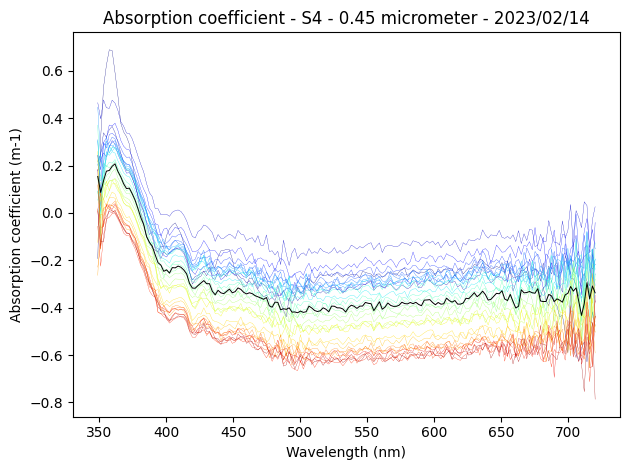

jpg done for sample S4 - 0.45 micrometer
sample S5 - 0.45 micrometer


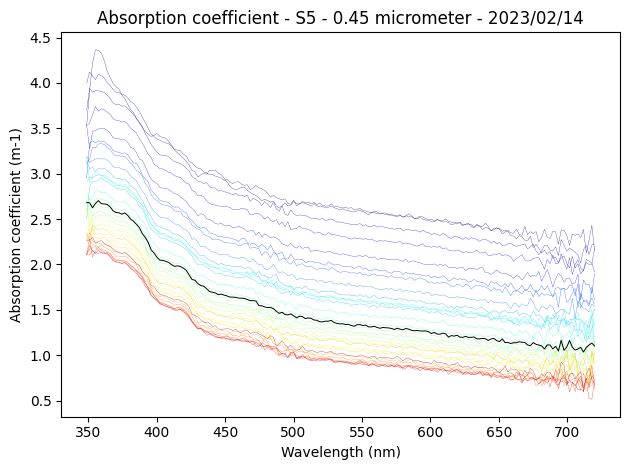

jpg done for sample S5 - 0.45 micrometer
Processing done


In [53]:
listSamples.remove("blank")#remove blanks from the list of measurements for next step

#for each sample (Station 4 at 0.22 microns for instance), calculate the absorption coefficient for each line and each wavelength and store it in a dataframe
for sample in listSamples:#loop through all possible samples
    print ("sample",sample)
    dfTemp = pd.DataFrame({'wavelength': listColNamesWL})#add the list of sampled wavelength as a column named Wavelength to a temporary dataframe
    listAcoeff=[]#create an empty list that will contain the absorption coefficient for each line and all wavelengths
    for line in range(df.shape[0]):#loop through all lines (df.shape[0] gets the number of lines in the original dataframe without the line corresponding to the column names)
        if df.iloc[line]["Comment2"]== sample:#if the description in column Comment2 corresponds to the sample of interest, proceed
            date=df.iloc[line]["DateTime"][:10]#get date that will be used for figure title and file name
            pathLength=float(df.iloc[line]["Comment3"])#get the pathlength
            for value in range (13,191):#get values from column 13 to 190 (columns that contain the Optical Density value for each wavelength)
                if pathLength==0.04:
                    listAcoeff.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3'])-listBlankMedian004[value-13])#converts Optical Density to Absorption Coefficient, substract the blank median values with same pathlength and save it to a list
                elif pathLength==0.05:
                    listAcoeff.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3'])-listBlankMedian005[value-13])
                elif pathLength==0.1:
                    listAcoeff.append(float(df.iloc[line][value])*2.303/float(df.loc[line]["Comment3"])-listBlankMedian01[value-13])
                else:
                    print ("error!")
            dfTemp[df.iloc[line]["DateTime"]] = listAcoeff#load listAcoeff to the temporary dataframe as a new column with name corresponding to the date
            listAcoeff=[]#empty the list for next loop
    
    #plot the data
    dfTemp['SampleMedian'] = dfTemp.median(axis=1)#calculate median value of the absorption coefficient for each wavelength from all measurements of the same sample
    dfTemp.plot("wavelength",dfTemp.columns[1:],linewidth=0.2,cmap='jet')#plot with column wavelength for x-axis and all other columns for y-axis (one column per line)         
    plt.gca().get_lines()[-1].set_color("black")#modify color of the last line, i.e. the one corresponding to the calculated median value
    plt.gca().get_lines()[-1].set_linewidth(0.7)#modify linewidth of the last line, i.e. the one corresponding to the calculated median value       
    plt.title("Absorption coefficient - "+ sample +' - '+ str(date))#define title with description of smaple and date
    plt.xlabel('Wavelength (nm)')#define x-axis label
    plt.ylabel('Absorption coefficient (m-1)')#define y-axis label
    plt.legend('',frameon=False)#remove legend from the plot
    plt.tight_layout()
    plt.show()#show plots in console
    plt.savefig(outPath+"/AbsorptionCoefficient_"+sample+'_'+date.replace("/", "-")+".jpg", dpi=800)#save plot to jpg
    plt.close()#close plot
    del dfTemp#delete temporary dataframe
    print("jpg done for sample",sample)
print ("Processing done")           